Several ipynb files are creates to work on this project
1. EDA.ipynb
2. 01_getting_familiar.ipynb
3. 02_data_preprocessing.ipynb and so on...

### <strong> Problem Statement: Bankruptcy Prediction using Natural Language Processing </strong>

# <strong>Exploratory Data Analysis</strong>

This notebook is dedicated to get familiar with the dataset we are using.

<hr>

### <strong>Dataset</strong>
We have a dataset with 2 different classes, Bankrupt and Healty companies, which contains scrapped MD&A section of companies of these class from their financial reports.

File Structure of this dataset is as follow:

<img src="Images/FileStructureofDataset.png" width=auto>
<!-- 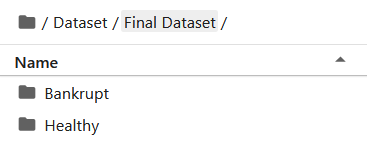 -->

There are 201 files in Bankrupt class and 298 in Healthy class.

<hr>

### <strong>Processing Textual Data</strong>
Here we try to tokenize, lemmatize and remove the stopwords from the above dataset

we need to perfom:
* Tokenization
* Lemmatiazation
* Stopword Removal

In [7]:
# install dependicies
!pip install spacy nltk matplotlib gensim textblob>> .installation_log.txt
!python -m spacy download en_core_web_sm >> .installation_log.txt

In [2]:
# install models from nltk
import nltk
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('vader_lexicon', quiet=True)
nltk.download('stopwords', quiet=True)

True

In [3]:
# import and load all the required libraries and models to work on text data
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
import nltk
import spacy

nlp = spacy.load('en_core_web_sm')

In [4]:
def preprocess(text):
    """
    Function to lemmatize and convert the text into small sentences(sentence tokenization)
    """
    text = text.lower()
    sentences = nltk.sent_tokenize(text)
    print("sentence tokenization: \n", sentences)
    
    words = [nltk.word_tokenize(sent) for sent in sentences]
    words = [[word.lower() for word in word_list if word.isalnum()] for word_list in words]
    stop_words = set(stopwords.words('english'))
    filtered_words = [[word for word in word_list if word not in stop_words] for word_list in words]
    
    lemmatized_words = []
    for word_list in filtered_words:
        doc = nlp(" ".join(word_list))
        lemmatized_words.append([token.lemma_ for token in doc])
        
    return lemmatized_words, sentences

In [5]:
# take a random sample from each class and process them
with open('Dataset/Final Dataset/Bankrupt/ABGSHIP_2013_MDA.txt', 'r') as file:
    md_a_bankrupt = file.read()
    processed_bankrupt, sentences = preprocess(md_a_bankrupt)

print()

with open('Dataset/Final Dataset/Healthy/ALEMBICLTD_2020_MDA.txt', 'r') as file:
    md_a_healthy = file.read()
    processed_healthy, sentences = preprocess(md_a_healthy)

sentence tokenization: 
 ["abg shipyard limited\nannual report 2012-2013\n28\nauditor's certificate on corporate governance\nto the members,\nabg shipyard limited.", 'st \nwe have examined the compliance of corporate governance by abg shipyard limited for the year ended on 31 march 2013, as \nstipulated in clause 49 of the listing agreement of the said company with the stock exchanges.', 'the compliance of conditions of corporate governance is the responsibility of the management.', 'our examination has been limited \nto a review of the procedures and implementations thereof adopted by the company for ensuring compliance with the conditions of \nthe corporate governance as stipulated in the said clause.', 'it is neither an audit nor an expression of opinion on the financial \nstatement of the company.', 'in our opinion and to the best of our information and according to the explanations given to us, and based on the representations \nmade by the directors and the management, we certify

<hr>

### <strong>Sentiment Analysis and Entity Extraction</strong>

trying to analyse and plot the ratio of sentiment of a sample of dataset from each class.

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment

sentiment_bankrupt = analyze_sentiment(md_a_bankrupt)
sentiment_healthy = analyze_sentiment(md_a_healthy)

print("Bankrupt Company Sentiment:")
print(sentiment_bankrupt)

print("\nHealthy Company Sentiment:")
print(sentiment_healthy)

# Sentiment analysis using TextBlob (optional)
blob_bankrupt = TextBlob(md_a_bankrupt)
blob_healthy = TextBlob(md_a_healthy)

print()
print("TextBlob Sentiment Bankrupt Company:", blob_bankrupt.sentiment)
print("TextBlob Sentiment Healthy Company:", blob_healthy.sentiment)


Bankrupt Company Sentiment:
{'neg': 0.048, 'neu': 0.845, 'pos': 0.106, 'compound': 0.9965}

Healthy Company Sentiment:
{'neg': 0.029, 'neu': 0.827, 'pos': 0.144, 'compound': 1.0}

TextBlob Sentiment Bankrupt Company: Sentiment(polarity=0.08191427581133465, subjectivity=0.3596701609936902)
TextBlob Sentiment Healthy Company: Sentiment(polarity=0.1178469986166266, subjectivity=0.4253129062168315)


In [9]:
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

entities_bankrupt = extract_entities(md_a_bankrupt)
entities_healthy = extract_entities(md_a_healthy)

print("Bankrupt Company Entities:")
print(entities_bankrupt)

print("\nHealthy Company Entities:")
print(entities_healthy)


Bankrupt Company Entities:
[('ABG Shipyard Limited', 'ORG'), ('2012-2013', 'DATE'), ('28', 'CARDINAL'), ('ABG Shipyard Limited', 'ORG'), ('Corporate Governance', 'ORG'), ('ABG Shipyard Limited', 'ORG'), ('the year ended on 31 March 2013', 'DATE'), ('Clause 49', 'EVENT'), ('the Listing Agreement', 'EVENT'), ('Corporate Governance', 'ORG'), ('Directors', 'PERSON'), ('Company', 'ORG'), ('Clause 49', 'EVENT'), ('Listing Agreement', 'WORK_OF_ART'), ('Company', 'ORG'), ('the \nManagement', 'ORG'), ('Nisar & Kumar\n', 'ORG'), ('107117W', 'DATE'), ('M. N. Ahmed\nPlace', 'PERSON'), ('30', 'CARDINAL'), ('2013', 'DATE'), ('18380', 'DATE'), ('ABG Shipyard Limited', 'ORG'), ('2012-2013', 'DATE'), ('29', 'CARDINAL'), ('Year 2012-13', 'DATE'), ('a challenging year', 'DATE'), ('Indian Economy', 'ORG'), ('4%', 'PERCENT'), ('2011', 'DATE'), ('3.2%', 'PERCENT'), ('2012', 'DATE'), ('5.1%', 'PERCENT'), ('6.4%', 'PERCENT'), ('the previous \nyear', 'DATE'), ('U.S.', 'GPE'), ('Euro', 'PERSON'), ('0.6%', 'PERC

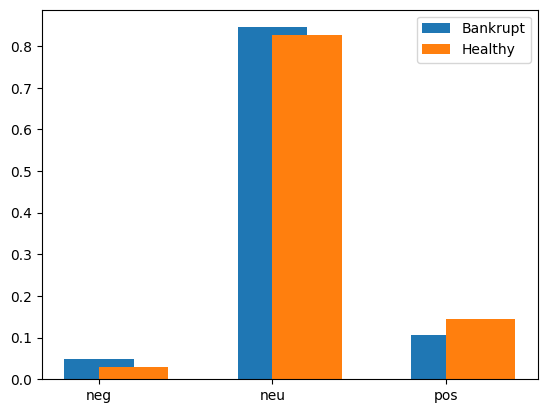

In [10]:
# plot the scores

labels = ['neg', 'neu', 'pos']
bankrupt_scores = [sentiment_bankrupt[label] for label in labels]
healthy_scores = [sentiment_healthy[label] for label in labels]

x = range(len(labels))
plt.bar(x, bankrupt_scores, width=0.4, label='Bankrupt', align='center')
plt.bar(x, healthy_scores, width=0.4, label='Healthy', align='edge')
plt.xticks(x, labels)
plt.legend()
plt.show()
